In [2]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation
from models import *

In [3]:
files = ['Data_sets/1_expB_osc_NatChem_MH.csv',
         'Data_sets/3b_expB_osc_NatChem_MH.csv',
         'Data_sets/4_expB_osc_NatChem_MH.csv']

df_list = [pd.read_csv(file) for file in files]

exp_data = pd.concat(df_list, axis=1)

exp_data.columns = ['t1', 'c1', 't3b', 'c3b', 't4', 'c4']

cut_off, CMC_3b = 112, 0.52
C_A2tol = exp_data.loc[0, 'c1'] + exp_data.loc[0, 'c4'] / 2

exp_data = exp_data.head(cut_off)
exp_data[['c1', 'c4']] /= C_A2tol
exp_data['c3b'] /= CMC_3b

for s in ['t1', 't3b', 't4']:
    exp_data = exp_data.drop_duplicates(subset=s)

df_MHNatChem = exp_data.clip(lower=0)
df_MHNatChem.loc[0, 't3b'] = 0
df_MHNatChem.loc[0, 't4'] = 0

print(C_A2tol)

3.1426606946408935


In [48]:
df_MHNatChem.head()

,t1,c1,t3b,c3b,t4,c4
0,0.000000,0.013890,0.000000,0.000000,0.000000,1.972220
1,0.053763,0.020203,0.086022,0.192308,0.128686,1.921812
3,0.129032,0.016415,0.161290,0.769231,0.225201,1.921812
4,0.215054,0.012627,0.172043,0.769231,0.246649,2.022629
6,0.286239,0.000000,0.247312,0.230769,0.300268,2.010027


In [49]:
t_end = df_MHNatChem[['t1', 't3b', 't4']].max().min()
t_fine = np.linspace(0, t_end, 100)
f_interp = {s: interp1d(df_MHNatChem[f't{s}'], df_MHNatChem[f'c{s}'], kind='linear') for s in ['1', '3b', '4']}

In [50]:
y_interp = {s: f_interp[s](t_fine) for s in ['1', '3b', '4']}

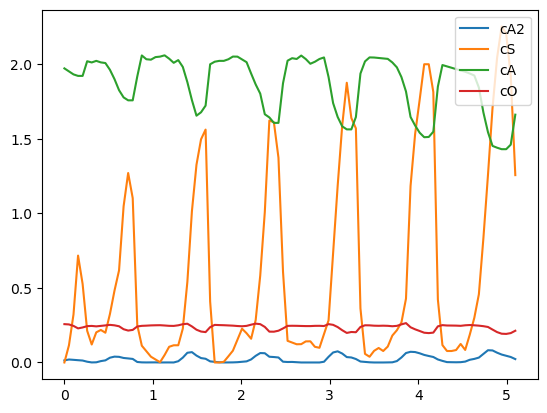

In [63]:
for s, label in zip(['1', '3b', '4'], ['A2', 'S', 'A']):
    plt.plot(t_fine, y_interp[s], label=f'c{label}')
    #df_MHNatChem.plot(x=f't{s}', y=f'c{s}', ax=plt.gca())

cA2 = y_interp['1']
cS = y_interp['3b']
lam = 0.17
cO = 1/(2 * (1 - cA2) + lam * cS)**2
plt.plot(t_fine, cO, label='cO')
plt.legend(loc=1)